In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE?
import joblib
from sklearn.preprocessing import StandardScaler




Init signature:
SMOTE(
    *,
    sampling_strategy='auto',
    random_state=None,
    k_neighbors=5,
    n_jobs=None,
)
Docstring:     
Class to perform over-sampling using SMOTE.

This object is an implementation of SMOTE - Synthetic Minority
Over-sampling Technique as presented in [1]_.

Read more in the :ref:`User Guide <smote_adasyn>`.

Parameters
----------
sampling_strategy : float, str, dict or callable, default='auto'
    Sampling information to resample the data set.

    - When ``float``, it corresponds to the desired ratio of the number of
      samples in the minority class over the number of samples in the
      majority class after resampling. Therefore, the ratio is expressed as
      :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
      number of samples in the minority class after resampling and
      :math:`N_{M}` is the number of samples in the majority class.

        .. warning::
           ``float`` is only available for **binary** classification

In [314]:
df = pd.read_excel("/Users/serwaa/polycypher/PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


# **1. Exploratory Data Analysis**
Check for the size of PCOS dataset we are using using .shape() , it gives number of rows and columns.

In [316]:
df.shape

(541, 45)

Shape indicates that the dataset has 541 observations/records and 45 attributes.

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

Checking for any null/missing values using *.isnull()*

In [320]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

Since, there are very neglible null values, we can drop them. Also, the column Unnamed has mostly missing values , its not useful for our analysis purpose.

In [322]:
df.dropna()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
180,181,181,1,30,70.0,150.0,31.111111,16,74,18,...,1.0,0,120,80,8,6,12.0,11.0,4.5,.
363,364,364,0,31,48.0,152.0,20.800000,17,72,18,...,1.0,0,110,80,1,3,13.0,13.0,7.0,7


Since in machine learning , we will work only with numerical data, we will convert 

In [324]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'],errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'],errors='coerce')

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [326]:
df.drop('Unnamed: 44',axis=1,inplace=True)

In [327]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [328]:
df_cleaned = df.apply(pd.to_numeric, errors='coerce')  # Converts all possible columns
df_cleaned.corr()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,...,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,...,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,...,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.083578,-0.083578,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,...,0.045656,0.159279,-0.080192,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,...,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050529,0.047572,1.000000,0.303804,...,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061905,-0.023766,0.303804,1.000000,...,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


In [329]:


correlation_with_target = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
print(correlation_with_target)


PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

**Anslysis using different plots**

**1. Distribution of PCOS Cases Across Age Groups**

In [332]:
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df['Age Group'] = pd.cut(df[' Age (yrs)'],bins = age_groups,labels = age_labels)

In [333]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

/var/folders/91/1jrrf3710lg46r44lyk8wr_h0000gn/T/ipykernel_69214/1467622942.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()


pandas.core.frame.DataFrame

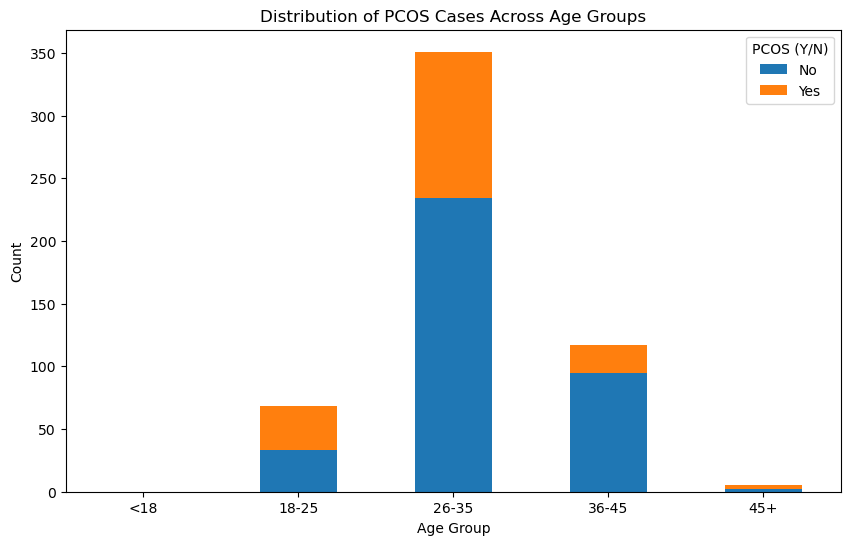

In [334]:
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

It can be observed from above plot that PCOS affects mainly the age group of 26-35 and 18-15.

**2. Distribution analysis for numerical attributes**

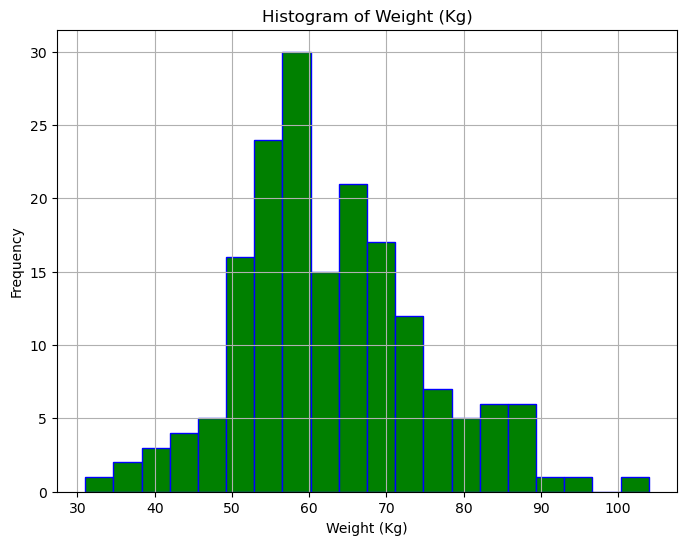

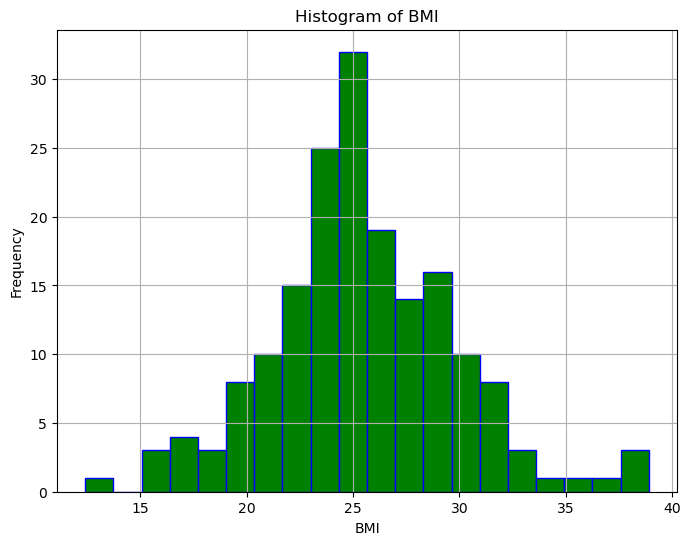

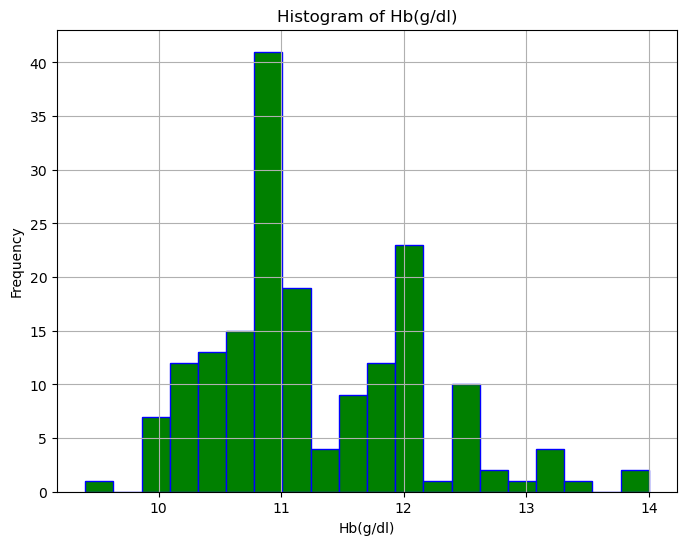

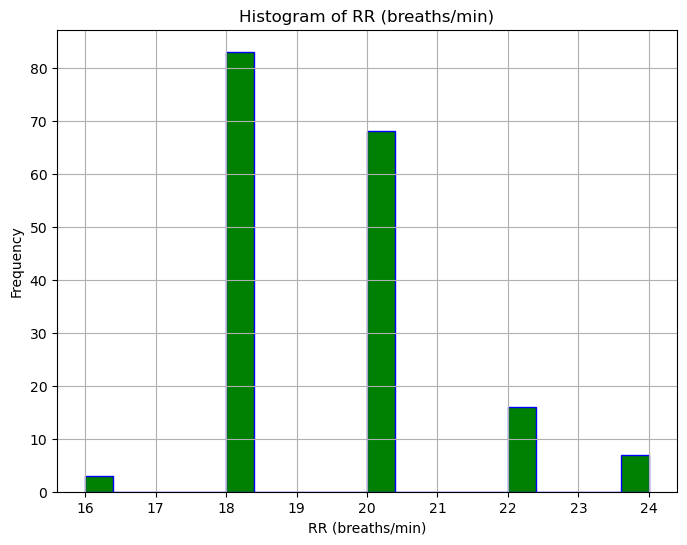

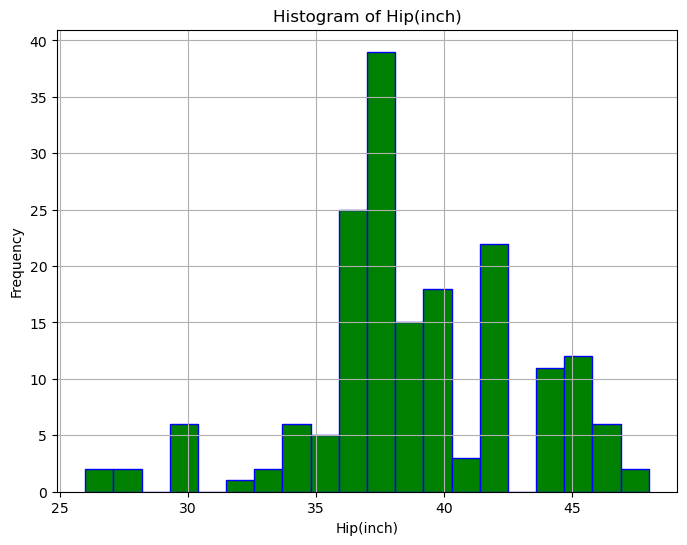

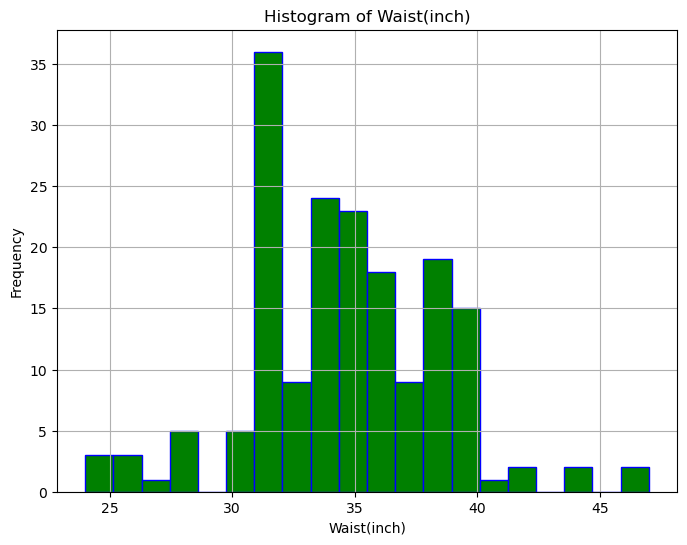

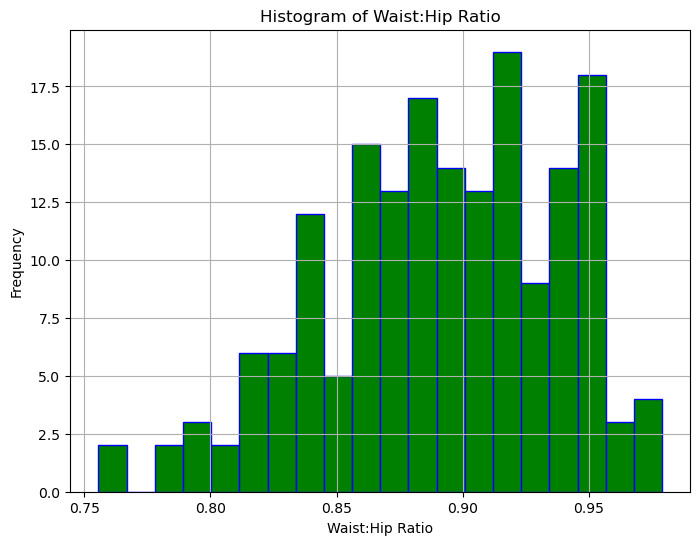

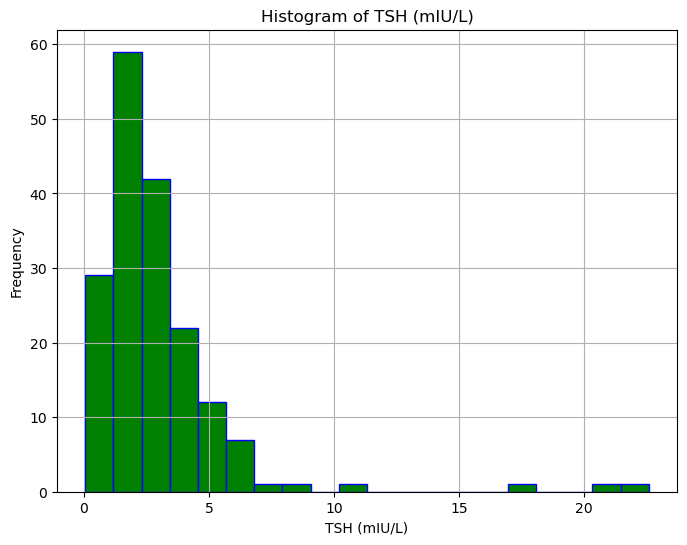

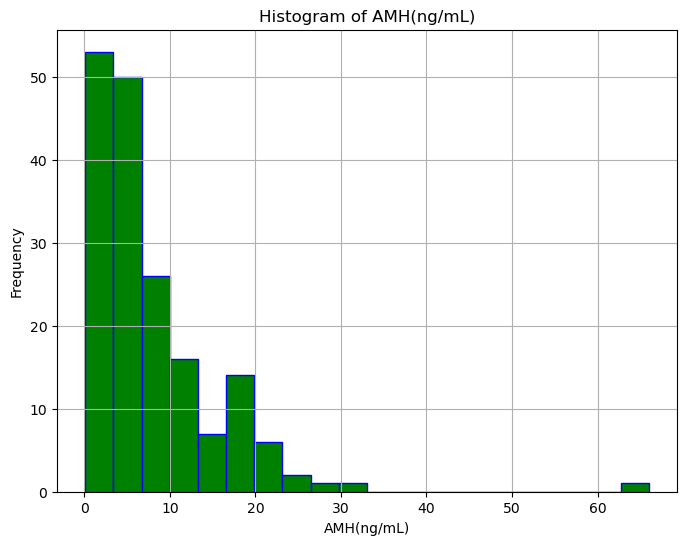

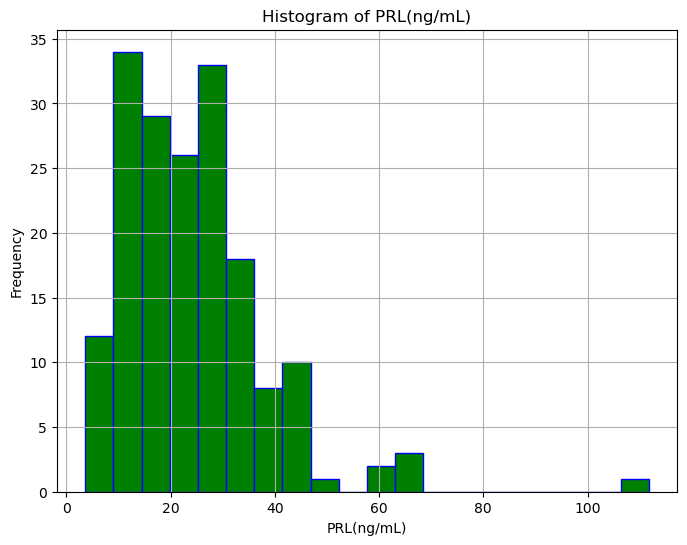

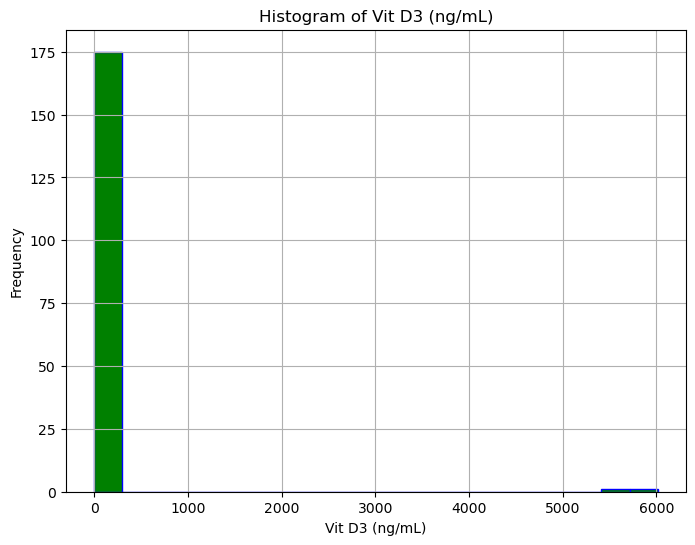

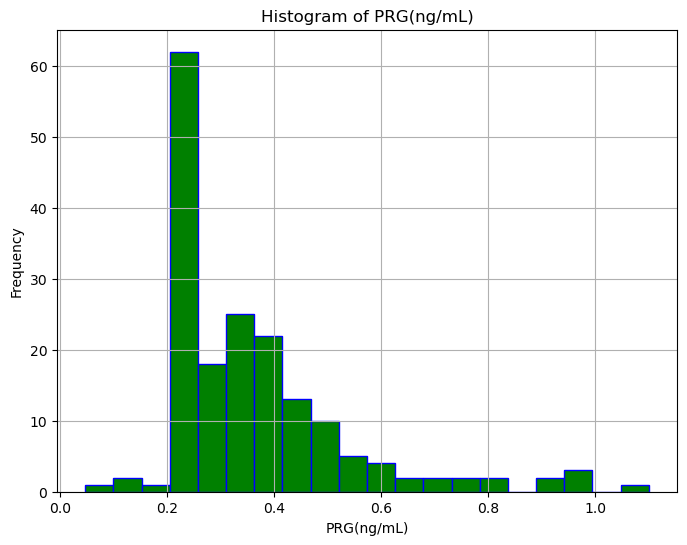

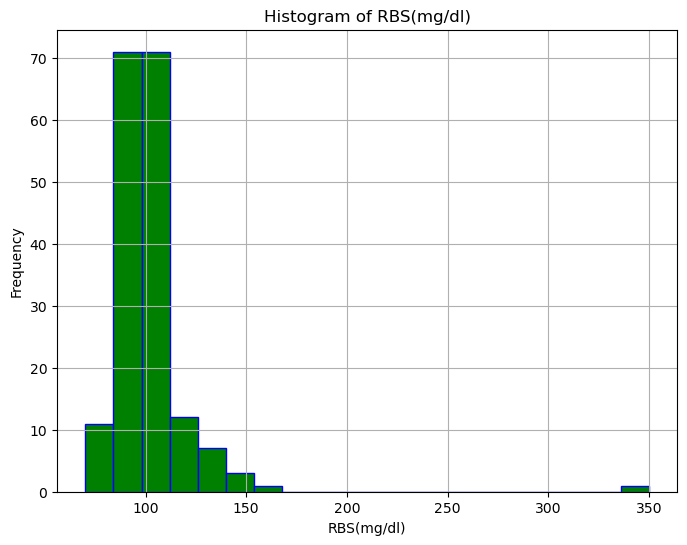

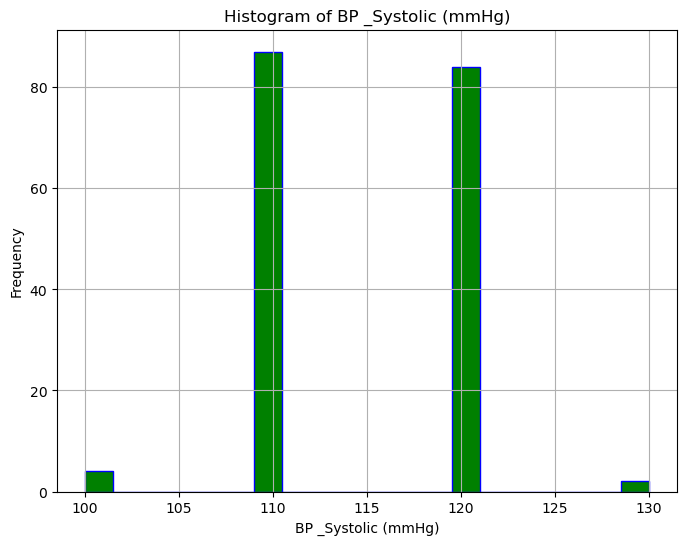

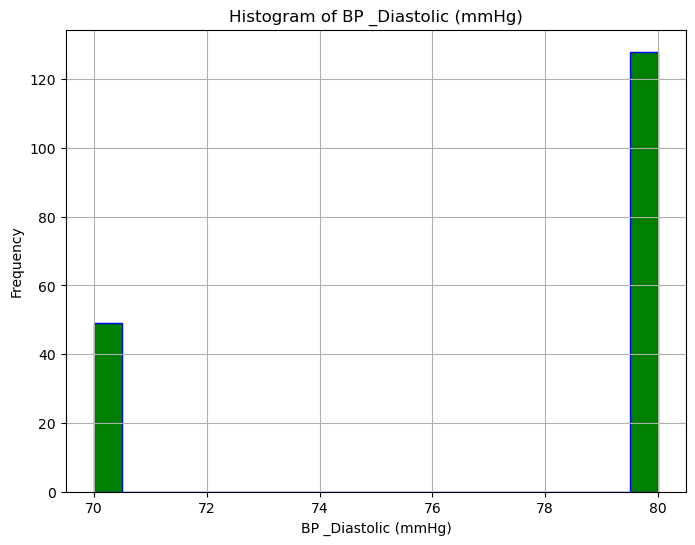

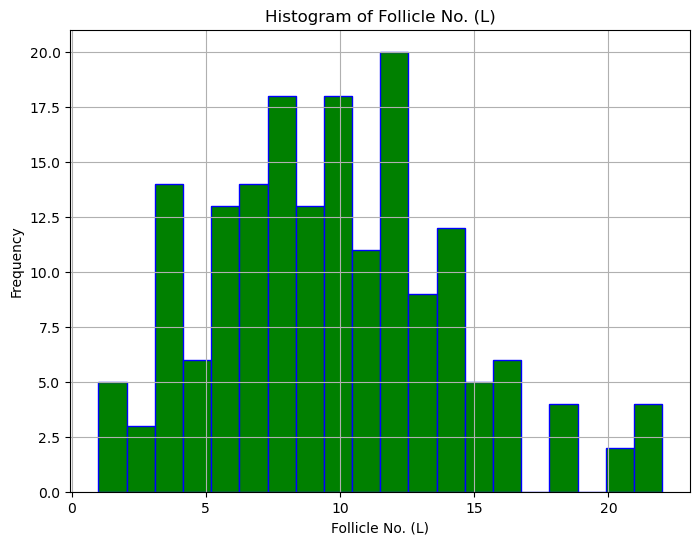

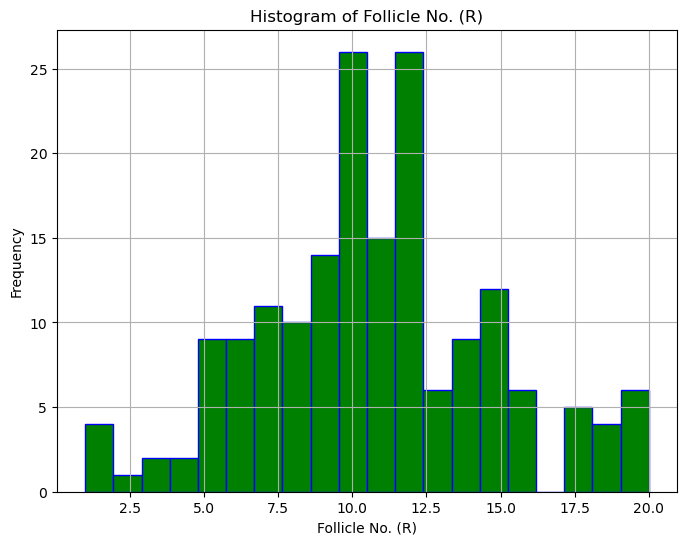

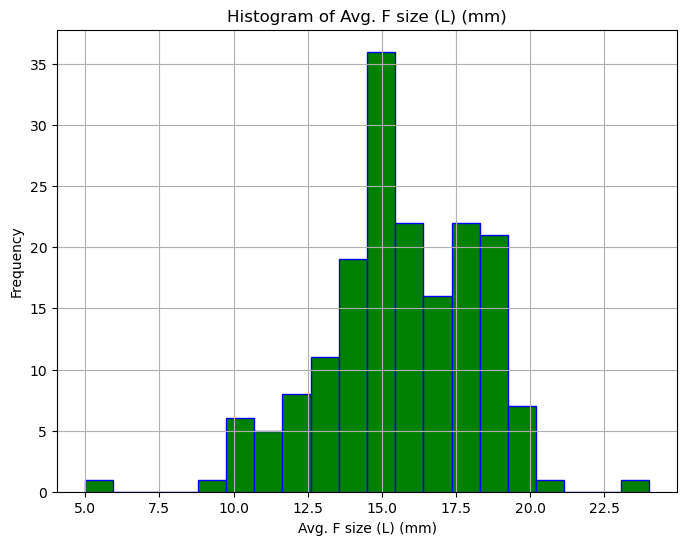

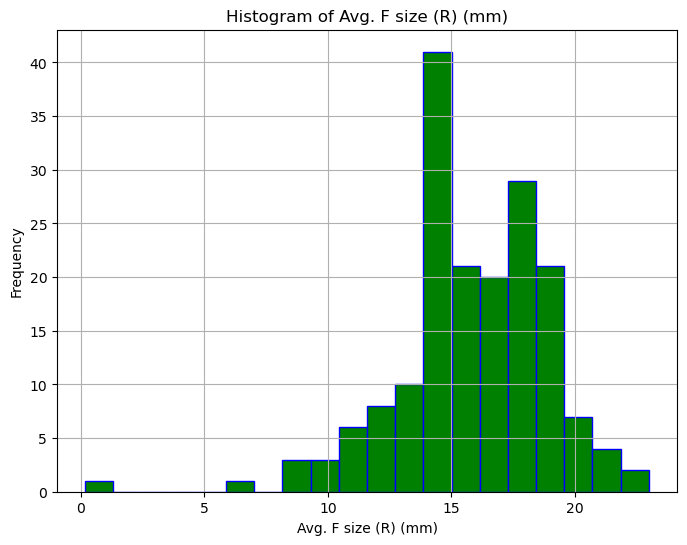

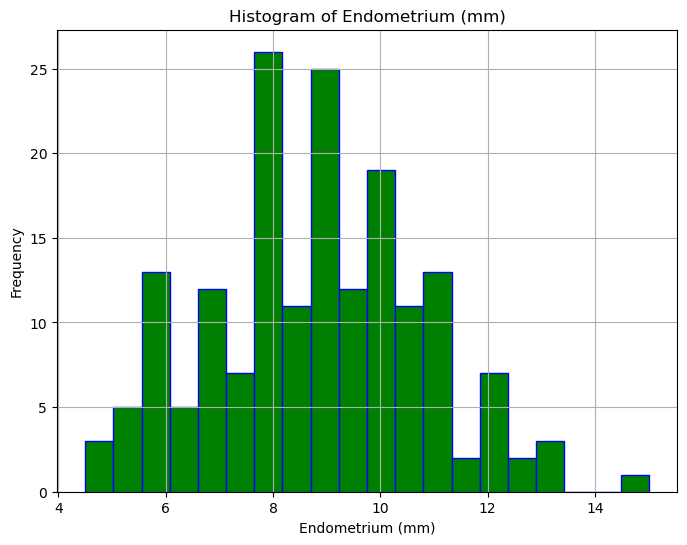

In [337]:
# List of numerical attributes for distribution analysis
numerical_attributes = ['Weight (Kg)', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
df_pcos = df[df['PCOS (Y/N)']==1]
# Create histograms for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df_pcos[attribute], bins=20, color='green', edgecolor='blue')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# **2. Feature Selection**

In [339]:
top_10_features = correlation_with_target[0:11]
print(top_10_features)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377933
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.263863
Weight (Kg)             0.211938
Name: PCOS (Y/N), dtype: float64


In [340]:
df_new = df[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)','Pimples(Y/N)','AMH(ng/mL)','Weight (Kg)']]

In [341]:
df_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         1
Pimples(Y/N)            0
AMH(ng/mL)              1
Weight (Kg)             0
dtype: int64

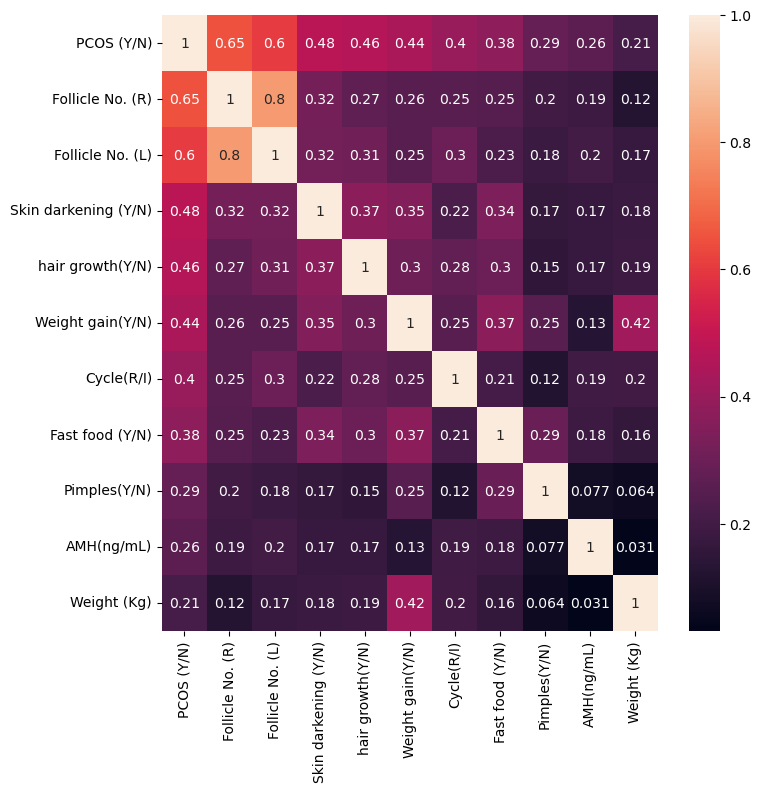

In [342]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [343]:
df_new['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [344]:
df_new.dropna(inplace=True)

/var/folders/91/1jrrf3710lg46r44lyk8wr_h0000gn/T/ipykernel_69214/420984286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


In [345]:
df_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         0
Pimples(Y/N)            0
AMH(ng/mL)              0
Weight (Kg)             0
dtype: int64

# **PCOS Detection using Builtin Logistic regression**

In [347]:
X = df_new.drop(['PCOS (Y/N)'],axis=1)
y = df_new['PCOS (Y/N)']

In [348]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [349]:
x_train

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg)
463,1,2,1,1,0,2,1.0,1,10.00,45.0
232,14,16,1,1,0,4,1.0,1,13.60,55.0
448,7,9,1,1,1,4,1.0,0,9.10,71.5
451,18,5,0,0,0,2,0.0,0,0.98,44.0
450,16,20,0,1,1,2,1.0,1,0.91,69.0
...,...,...,...,...,...,...,...,...,...,...
71,6,5,0,0,0,2,0.0,0,2.58,61.0
106,4,6,1,1,1,4,0.0,1,3.90,60.0
271,3,2,0,0,0,2,0.0,1,3.20,55.7
437,12,9,1,0,1,4,1.0,1,8.00,71.0


In [350]:
logreg = LogisticRegression()

In [351]:
logreg.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [352]:
y_pred = logreg.predict(x_test)

In [353]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)

In [354]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8888888888888888
Confusion Matrix:
[[74  5]
 [ 7 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        79
           1       0.81      0.76      0.79        29

    accuracy                           0.89       108
   macro avg       0.86      0.85      0.86       108
weighted avg       0.89      0.89      0.89       108



**Conclusion for Logistic Regression :**

The model performs well for class 0 (the negative class) with high precision (91%), recall (94%), and F1-score (92%).
The model performs reasonably well for class 1 (the positive class) with a decent precision (81%) and F1-score (79%), but the recall (76%) is slightly lower, indicating that some positive samples are being misclassified as negative.

# **PCOS Detection using Our Logistic Regression model**

In [357]:
import numpy as np

class Logistic_Regression_scratch: 
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        # Initialize hyperparameters of the model
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        # Sigmoid function to map the output to a probability value
        return 1 / (1 + np.exp(-z))

    def initialize_weights(self, num_features):
        # Initialize model weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0

    def fit(self, X, y):
        # Add a bias column to the input features for the intercept term
        #X = np.insert(X, 0, 1, axis=1)

        # Initialize weights and bias
        self.initialize_weights(X.shape[1])

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            error = y - predictions

            # Update weights and bias using gradient descent
            self.weights += self.learning_rate * np.dot(X.T, error) / X.shape[0]
            self.bias += self.learning_rate * np.sum(error) / X.shape[0]

    def predict(self, X):
        # Add a bias column to the input features for the intercept term
        #X = np.insert(X, 0, 1, axis=1)

        # Predicted probabilities using the sigmoid function
        predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)

        # Convert probabilities to binary predictions (0 or 1)
        return np.round(predictions)


In [358]:
model = Logistic_Regression_scratch(learning_rate=0.01,num_iterations=1000)
model.fit(x_train,y_train)
predictions = model1.predict(x_test)

In [359]:
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8148148148148148
Confusion Matrix:
[[78  1]
 [19 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89        79
           1       0.91      0.34      0.50        29

    accuracy                           0.81       108
   macro avg       0.86      0.67      0.69       108
weighted avg       0.83      0.81      0.78       108



In [360]:

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # Or X_train if you split your data earlier

In [362]:
!pip install dill


In [366]:
import dill

# Train your model
model = Logistic_Regression_scratch()
model.fit(x_train_scaled, y_train)

# Save it using dill
with open('pcos_model.pkl', 'wb') as f:
    dill.dump(model, f)


In [370]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']